In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

filename = '../input/exchange-rates-from-1975-to-2022/Exchange Rates from 1975-2022.csv'
df = pd.read_csv(filepath_or_buffer=filename, skiprows=[0, 1, 3, 4, ], )
df.columns = ['Year', 'Month', 'AUD', 'CAD', 'CNY', 'EUR', 'INR', 'IDR', 'JPY', 'KRW', 'MYR', 'TWD', 'PHP', 'GBP', 'SGD', 'ZAR', 'CHF', 'THB', 'USD']
df = df.replace(to_replace={'N.A.': np.nan})
df = df.head(n=629)
df.head()

,Year,Month,AUD,CAD,CNY,EUR,INR,IDR,JPY,KRW,MYR,TWD,PHP,GBP,SGD,ZAR,CHF,THB,USD
0,1975,NaN,6.47,4.86,2.6657,NaN,NaN,NaN,0.0167,0.0098,NaN,0.130,NaN,10.90,2.08,NaN,1.91,NaN,4.939
1,1976,NaN,6.00,4.98,2.5401,NaN,NaN,NaN,0.0165,0.0099,NaN,0.129,NaN,8.86,1.99,NaN,1.96,NaN,4.904
2,1977,NaN,5.16,4.39,2.5131,NaN,NaN,NaN,0.0174,0.0096,NaN,0.123,NaN,8.14,1.91,NaN,1.95,NaN,4.662
3,1978,NaN,5.36,4.11,2.7681,NaN,NaN,NaN,0.0225,0.0096,NaN,0.126,NaN,9.00,2.06,NaN,2.65,NaN,4.685
4,1979,NaN,5.59,4.27,3.1971,NaN,NaN,NaN,0.0229,0.0103,NaN,0.125,NaN,10.64,2.30,NaN,3.01,NaN,5.003


In [2]:
annual_df = df[df['Month'].isna()]
monthly_df = df[~df['Month'].isna()]

In [3]:
annual_df.describe()

,AUD,CAD,CNY,JPY,KRW,TWD,GBP,SGD,CHF,USD
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,5.896667,5.932292,1.637377,0.059110,0.008171,0.230688,11.838958,4.516667,5.669583,7.321188
std,0.818687,0.936322,0.847680,0.021746,0.001592,0.051400,1.605757,1.262632,2.023512,1.022129
min,4.040000,4.110000,0.896900,0.016500,0.005600,0.123000,8.140000,1.910000,1.910000,4.662000
25%,5.440000,5.245000,0.968150,0.052250,0.006800,0.221000,10.640000,3.700000,4.557500,7.736000
50%,5.835000,5.915000,1.206150,0.065350,0.008150,0.247500,11.850000,4.655000,5.585000,7.765000
75%,6.180000,6.465000,2.140200,0.071925,0.009600,0.265750,12.785000,5.622500,7.572500,7.791750
max,8.040000,7.870000,3.678500,0.097800,0.011600,0.291000,15.620000,6.210000,8.820000,7.839000


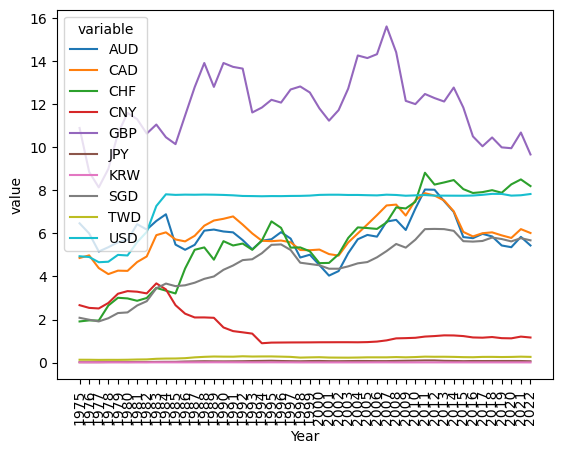

In [4]:
%matplotlib inline
from seaborn import lineplot
drop_columns = sorted(['Month', 'EUR', 'INR', 'IDR', 'MYR', 'PHP', 'ZAR', 'THB'])
keep_columns = sorted(['AUD', 'CAD', 'CNY', 'JPY', 'KRW', 'TWD', 'GBP', 'SGD', 'CHF', 'USD'])
ax = lineplot(data=pd.melt(annual_df.drop(columns=drop_columns), id_vars='Year', value_vars=keep_columns, ), x='Year', y='value', hue='variable')
ax.tick_params(axis='x', rotation=90)